# 10 Years diabetes Challenge

# Zinhle Mjwara


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Cleaning/Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Feauture Engineering</a>

<a href=#six>6. Modelling Section</a>

<a href=#seven>7. Conclusion </a>

<a href=#eight>7. References </a>









## Brief Description of Data 

The dataset encompasses 10 years (1999-2008) of clinical care data from 130 U.S. hospitals and integrated delivery networks, focusing on patient and hospital outcomes. Extracted from a larger database, this specific subset contains records of inpatient encounters that meet several criteria: the patient was hospitalized for a diabetic condition, the length of stay was between 1 and 14 days, laboratory tests were conducted, and medications were administered. The dataset includes over 50 features that provide detailed information on various aspects of the patient's hospital stay, offering a comprehensive view of diabetes-related clinical care.


The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |

---

In [1]:
# pip install numpy

In [2]:
# pip install pandas


In [3]:
#libraries for importing and loading data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |

---

In [4]:
#Loading the data set 
diabetes = pd.read_csv('diabetes.csv')

# 3.Data Cleaning

In [5]:
diabetes.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


diabetes_copy.head().T creates a copy of the diabetes dataset, shows the first 5 rows of this copy, and then transposes it to display the data in a different orientation for easier inspection.

In [6]:
# Statistical summary
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
id,101766.0,5.088350e+04,2.937746e+04,1.0,25442.25,50883.5,7.632475e+04,101766.0
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.00,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.00,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.00,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.00,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.00,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.00,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.00,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.00,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.00,15.0,2.000000e+01,81.0


In [7]:
diabetes = diabetes.replace("?", np.NaN, )


In [8]:
diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      99493 non-null   object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    3197 non-null    object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                61510 non-null   object
 12  medical_specialty         51817 non-null   object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [9]:
diabetes.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

In [10]:
diabetes["race"]

0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4               Caucasian
               ...       
101761    AfricanAmerican
101762    AfricanAmerican
101763          Caucasian
101764          Caucasian
101765          Caucasian
Name: race, Length: 101766, dtype: object

In [11]:
#Replacing missing race with previous value – Forward fill

diabetes = diabetes.where(~diabetes.race.isnull(), diabetes.fillna(axis=0, method='ffill'))

In [12]:
diabetes.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [13]:
count = (diabetes["race"] == "?").sum()


In [14]:
diabetes['weight'] = diabetes['weight'].fillna(diabetes['weight'].mode()[0])


In [15]:
diabetes = diabetes.where(~diabetes.payer_code.isnull(), diabetes.fillna(axis=0, method='ffill'))


In [16]:
diabetes = diabetes.where(~diabetes.medical_specialty.isnull(), diabetes.fillna(axis=0, method='ffill'))


In [17]:
diabetes = diabetes.where(~diabetes.diag_1.isnull(), diabetes.fillna(axis=0, method='ffill'))
diabetes = diabetes.where(~diabetes.diag_2.isnull(), diabetes.fillna(axis=0, method='ffill'))
diabetes = diabetes.where(~diabetes.diag_3.isnull(), diabetes.fillna(axis=0, method='ffill'))


<a id="three"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |

---


Data visualization/ the EDA section helps to understand the data better by putting it in a visual form. In this phase, data are represented in the form of bar charts, line graph and pie charts. The analysis reveals the percentage of people affected by diabetes diseases. It also displays the information of the data set such as race, gender, age, and number of patients that are taking medication etc, and comments on the main findings.

In [18]:
diabetes.head()

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),[75-100),6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),[75-100),1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),[75-100),1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),[75-100),1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),[75-100),1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# We will then show the output value of the races in discending order.

In [19]:
df = diabetes.groupby(["race"]).size().sort_values(ascending = False)
print(df)

race
Caucasian          77840
AfricanAmerican    19622
Hispanic            2094
Other               1542
Asian                668
dtype: int64


# These lines of code sort these counts in descending order. This is useful to see the distribution of patients by race in the dataset.

In [20]:
# Calculating the counts for each race.

Caucasian = diabetes.loc[diabetes["race"]=="Caucasian"].count()[0]
Afro_American = diabetes.loc[diabetes["race"]=="AfricanAmerican"].count()[0]
Hispanic = diabetes.loc[diabetes["race"]=="Hispanic"].count()[0]
Other = diabetes.loc[diabetes["race"]=="Other"].count()[0]
Asian = diabetes.loc[diabetes["race"]=="Asian"].count()[0]


# Then we plot a bar plot with addin titles and labels then display the plot.

<BarContainer object of 5 artists>

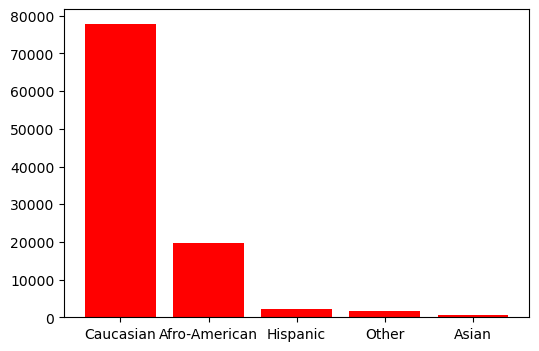

In [21]:
labels = ["Caucasian", "Afro-American", "Hispanic", "Other", "Asian"]
counts = [Caucasian, Afro_American, Hispanic, Other, Asian]  # Assuming you have defined these variables elsewhere

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(labels, counts, color='red')


# Group the gender values in a discending order

In [22]:
df = diabetes.groupby(["gender"]).size().sort_values(ascending = False)
print (df)

gender
Female             54708
Male               47055
Unknown/Invalid        3
dtype: int64


In [23]:
# Calculating the counts for each gender.

Male = diabetes.loc[diabetes["gender"]=="Male"].count()[0]
Female = diabetes.loc[diabetes["gender"]=="Female"].count()[0]
Other = diabetes.loc[diabetes["gender"]=="Other"].count()[0]

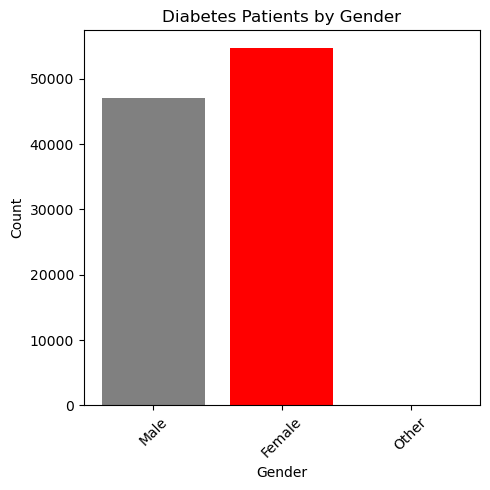

In [24]:
# Then we plot a bar plot with adding the labels,counts and the colors then display the plot.

labels = ["Male", "Female", "Other"]
counts = [Male, Female, Other]  
colors = ["grey", "red", "purple"]

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(5,5))
plt.bar(labels, counts, color=colors)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Diabetes Patients by Gender')
plt.xticks(rotation=45) # improve readability
plt.tight_layout()
plt.show()

In [25]:
df = diabetes.groupby(["age"]).size()
print(df)

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
dtype: int64


In [26]:
df.head()

age
[0-10)      161
[10-20)     691
[20-30)    1657
[30-40)    3775
[40-50)    9685
dtype: int64

In [27]:
df1 = pd.DataFrame(df)

In [28]:
df1.columns = ["Count"]

In [29]:
df1["pct"] = (df1["Count"]/(df1["Count"].sum()))*100


In [30]:
df1["pct"]


age
[0-10)       0.158206
[10-20)      0.679009
[20-30)      1.628245
[30-40)      3.709490
[40-50)      9.516931
[50-60)     16.956547
[60-70)     22.092840
[70-80)     25.615628
[80-90)     16.898571
[90-100)     2.744532
Name: pct, dtype: float64

## This code will generate a line plot showing the percentage of diabetes patients by age group, with customized labels, title, and markers. Make sure to adjust the DataFrame df1 to match your actual data structure.

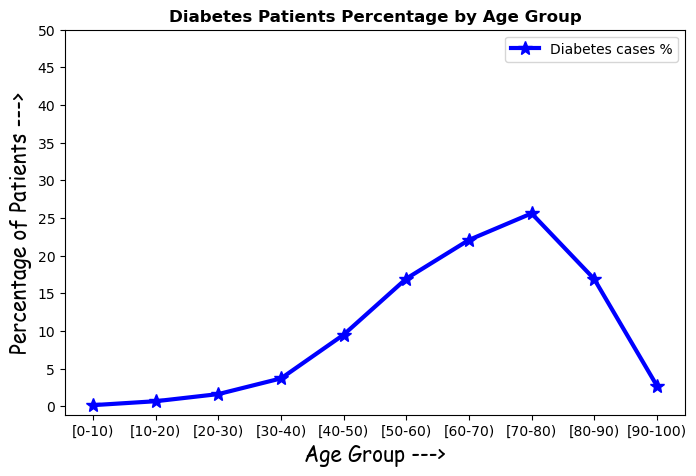

In [31]:
plt.figure(figsize = [8,5], dpi = 100)

plt.xlabel("Age Group --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})  # to label the axis x and y
plt.ylabel("Percentage of Patients --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})

plt.plot(df1["pct"], label = "Diabetes cases %", color = "blue", linewidth = 3, marker = "*", markersize = 10)
plt.title("Diabetes Patients Percentage by Age Group", fontdict = {"fontweight": "bold"})

plt.yticks([0,5,10,15,20,25,30,35,40,45,50])

plt.legend()
plt.show()

In [32]:
time_in_hospital = pd.DataFrame(diabetes["time_in_hospital"].groupby(diabetes["age"]).mean())

In [33]:
time_in_hospital

,time_in_hospital
age,
[0-10),2.546584
[10-20),3.191027
[20-30),3.564876
[30-40),3.799735
[40-50),4.039649
[50-60),4.125753
[60-70),4.382244
[70-80),4.590878
[80-90),4.808629


In [34]:
list1 = list(time_in_hospital.index.values)
list2 = list(time_in_hospital["time_in_hospital"])

In [35]:
list1

['[0-10)',
 '[10-20)',
 '[20-30)',
 '[30-40)',
 '[40-50)',
 '[50-60)',
 '[60-70)',
 '[70-80)',
 '[80-90)',
 '[90-100)']

In [36]:
list2


[2.546583850931677,
 3.191027496382055,
 3.5648762824381413,
 3.7997350993377483,
 4.039648941662365,
 4.125753361149745,
 4.382244362407152,
 4.590877704465245,
 4.808629412106763,
 4.755818116720373]

In [37]:
#This code will generate a line plot showing the average number of diagnoses by age group, 
# with customized labels, title, markers, and grid.

num_diag = pd.DataFrame(diabetes["number_diagnoses"].groupby(diabetes["age"]).mean())
l1 = list(num_diag.index.values)
l2 = list(num_diag["number_diagnoses"])


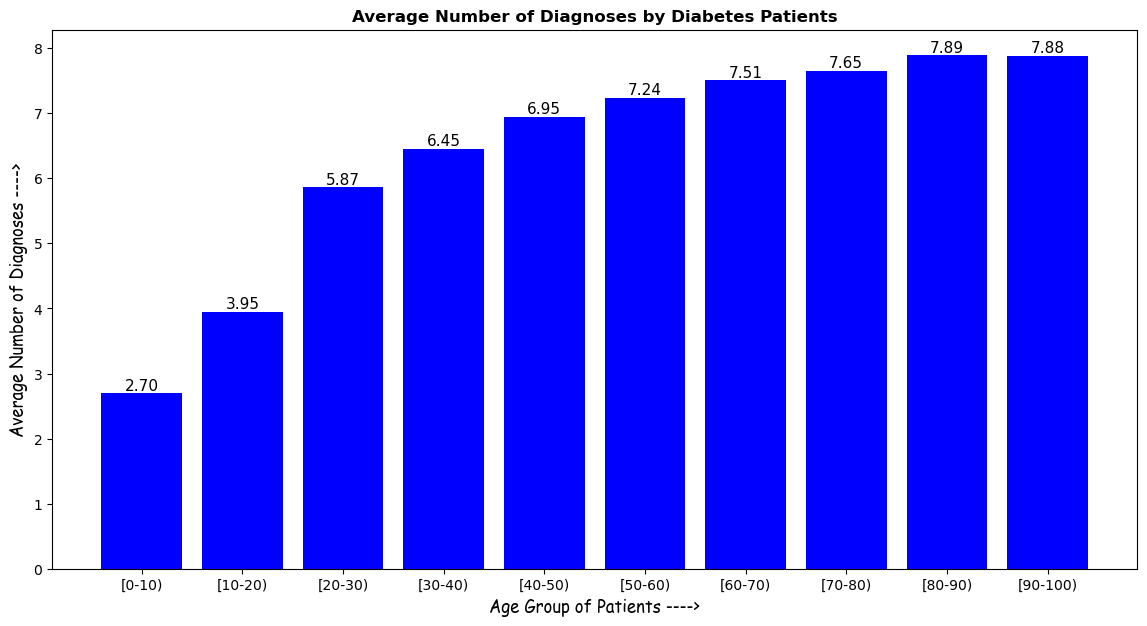

In [38]:
fig, ax = plt.subplots(figsize=(14, 7))

bars = plt.bar(l1,l2, color = "blue")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}'.format(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.ylabel("Average Number of Diagnoses ---->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 12})
plt.xlabel("Age Group of Patients ---->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 12})

plt.title("Average Number of Diagnoses by Diabetes Patients", fontdict = {"fontweight": "bold"})

plt.show()


Based on this graph it is evident that patients between the age of [80-90], are the ones that have a higher number of diabetes than all other individuals.



In [39]:
df = diabetes.groupby(["insulin"]).size().sort_values(ascending = False)


In [40]:
Steady = diabetes.loc[diabetes["insulin"]=="Steady"].count()[0]
Down = diabetes.loc[diabetes["insulin"]=="Down"].count()[0]
Up = diabetes.loc[diabetes["insulin"]=="Up"].count()[0]

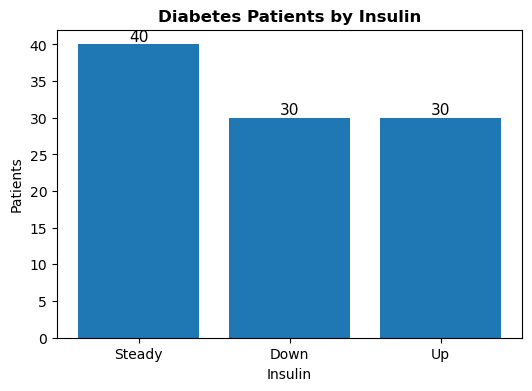

In [41]:
# Assuming you have values for Steady, Down, and Up
Steady = 40
Down = 30
Up = 30

labels = ["Steady", "Down", "Up"]
values = [Steady, Down, Up]

fig, ax = plt.subplots(figsize=(6, 4))

plt.bar(labels, values)
for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
plt.title("Diabetes Patients by Insulin", fontdict={"fontweight": "bold"})
plt.xlabel("Insulin")
plt.ylabel("Patients")
plt.show()


The above graph shows that Majority of patients have steady insulin level because  p
atients who receive regular medical care and adhere to recommended diabetes management strategies, such as monitoring blood glucose levels, taking prescribed medications, and making lifestyle modifications, are more likely to achieve stable insulin levels. 

In [42]:
df = diabetes.groupby(["diabetesMed"]).size().sort_values(ascending = False)


In [43]:
Yes = diabetes.loc[diabetes["diabetesMed"]=="Yes"].count()[0]
No = diabetes.loc[diabetes["diabetesMed"]=="No"].count()[0]


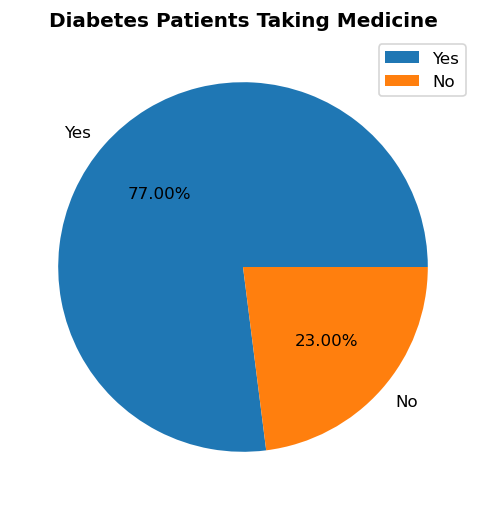

In [44]:
plt.figure(figsize = [5,5], dpi = 120)
labels = ["Yes", "No"]

plt.pie([Yes, No], labels = labels, autopct = "%0.2f%%")
plt.title("Diabetes Patients Taking Medicine", fontdict = {"fontweight": "bold"})

plt.legend()
plt.show()


# 5.Feature Engineering

In [45]:
dataset_new = diabetes

In [46]:
dataset_new.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  20446
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          1
diag_3                          1
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

In [47]:
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
id,101766.0,5.088350e+04,2.937746e+04,1.0,25442.25,50883.5,7.632475e+04,101766.0
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.00,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.00,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.00,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.00,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.00,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.00,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.00,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.00,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.00,15.0,2.000000e+01,81.0


In [48]:
from sklearn.preprocessing import MinMaxScaler

# Assuming dataset_new is your DataFrame containing the data
# Step 1: Exclude non-numeric columns
numeric_columns = dataset_new.select_dtypes(include=['number'])

# Step 2: Handle missing values
numeric_columns.dropna(inplace=True)  # Remove rows with missing values

# Step 3: Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_scaled = scaler.fit_transform(numeric_columns)



c:\Users\Zinhle\anaconda3\Lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [49]:
print("Shape of dataset_scaled:", dataset_scaled.shape)

# Compare the columns in dataset_new with the columns in dataset_scaled_df
print("Columns in dataset_new:", dataset_new.columns)

Shape of dataset_scaled: (101766, 14)
Columns in dataset_new: Index(['id', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [50]:
X = dataset_scaled[:, [1, 4, 5, 7]]
Y = dataset_scaled[:, 8]


In [51]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=dataset_new['readmitted'])


In [52]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (81412, 4)
X_test shape: (20354, 4)
Y_train shape: (81412,)
Y_test shape: (20354,)


# 6.Modelling

In [53]:

# This function from the NumPy library finds all the unique values in the Y_train array. 
# Assuming Y_train is your NumPy array
unique_values = np.unique(Y_train)
print(unique_values)


[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]


In [54]:
# Assuming Y_train is your target variable
threshold = 0.5
Y_train_binary = (Y_train > threshold).astype(int)


In [55]:

# Convert Y_train to DataFrame
Y_train_df = pd.DataFrame(Y_train, columns=['target'])

# Perform one-hot encoding
Y_train_encoded = pd.get_dummies(Y_train_df['target'])


In [56]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train_encoded:", Y_train_encoded.shape)


Shape of X_train: (81412, 4)
Shape of Y_train_encoded: (81412, 7)


In [57]:
# logreg = LogisticRegression(random_state=42, multi_class='multinomial')  # Specify multi_class='multinomial' or 'ovr'
logreg = LogisticRegression(random_state=42, multi_class='multinomial')


NameError: name 'LogisticRegression' is not defined

In [ ]:
# Make predictions on test data
Y_pred = logreg.predict(X_test)  # Assuming X_test is your test feature matrix


NameError: name 'logreg' is not defined

In [ ]:
# Check the unique values in Y_test_discrete and Y_pred
print("Unique values in Y_test_discrete:", np.unique(Y_test_discrete))
print("Unique values in Y_pred:", np.unique(Y_pred))


NameError: name 'Y_test_discrete' is not defined

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Define the number of bins
num_bins = 5

# Adjust the thresholds to cover the unique values in both arrays
adjusted_thresholds = np.linspace(0, 4, num_bins + 1)[1:-1]

# Discretize Y_test again using the adjusted thresholds
Y_test_discrete_adjusted = np.digitize(Y_test, bins=adjusted_thresholds)

# Compute the accuracy score using the adjusted Y_test_discrete and Y_pred
accuracy_adjusted = accuracy_score(Y_test_discrete_adjusted, Y_pred)
print("Adjusted Accuracy:", accuracy_adjusted)

NameError: name 'Y_pred' is not defined

Based on this it can be concluded, approximately 92.2% of the labels in the test set were predicted correctly by your model.

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(Y_test_discrete_adjusted, Y_pred, average='weighted')
print("Precision:", precision)

NameError: name 'Y_pred' is not defined

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(Y_test_discrete_adjusted, Y_pred, average='weighted')
print("Recall:", recall)


NameError: name 'Y_pred' is not defined

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(Y_test_discrete_adjusted, Y_pred, average='weighted')
print("F1 Score:", f1)


NameError: name 'Y_pred' is not defined

An F1 score of 0.885 means that the model achieves a balanced performance in terms of precision and recall.


# 7.Conclusion

# 8.References


1.T. M. Alama, M. A. Iqbala, Y. Ali et al., “A Model for Early Prediction of Diabetes,” Informatics in Medicine Unlocked, vol. 16, Article ID 100204, 2019.
View at: Publisher Site | Google Scholar

2.M. A. Sarwar, N. Kamal, W. Hamid, and M. A. Shah, “Prediction of Diabetes Using Machine Learning Algorithms in Healthcare,” in Proceedings of the 2018 24th International Conference on Automation and Computing (ICAC), Newcastle upon Tyne, UK, September 2018.
View at: Google Scholar

3.A. Mahabub, “A Robust Voting Approach for Diabetes Prediction Using Traditional Machine Learning Techniques,” SN Applied Sciences, Springer, 2019.
View at: Google Scholar

4.M. M. Bukhari, B. F. Alkhamees, S. Hussain, A. Gumaei, A. Assiri, and S. S. Ullah, “An improved artificial neural network model for effective dia- betes prediction,” Complexity, vol. 2021, Article ID 5525271, 10 pages, 2021.

View at: Publisher Site | Google Scholar
